In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
import pandas as pd
train_data = pd.read_csv(r'C:\Users\Hp\Desktop\TitanicProject\train.csv')

## Imported Titanic dataset using panda__


In [2]:
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# setting pss_id as primary key
(np.unique(train_data['PassengerId'].values).size, 
np.unique(train_data['PassengerId'].values).size == train_data.shape[0])
train_data.set_index(['PassengerId'], inplace=True)

In [4]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Extracting status from name


#Since name field doesn't contribute to the ML model, we are extracting out status of people from name column








import re
patt = re.compile('\s(\S+\.)')
 # 1 whitespace character followed by several 
# non-whitespace characters followed by a dot

titles = np.array([re.search(patt, i)[1] for i in train_data['Name'].values])

print('Unique titles ({}): \n{}'.format(np.unique(titles).shape[0], np.unique(titles)))
print('')
print('Number of titles that are NaN/Null: {}'.format(pd.isnull(titles).sum()))
train_data = train_data.assign(Title=titles)
train_data = train_data.drop('Name', axis=1)
train_data['Title'].groupby(train_data['Title']).size()
train_data['Title'] = train_data['Title'].replace('Mlle.','Miss.')
train_data['Title'] = train_data['Title'].replace('Ms.','Miss.')  
train_data['Title'] = train_data['Title'].replace('Mme.','Mrs.')
train_data['Title'] = train_data['Title'].replace(['Capt.','Col.','Major.'],'Army.')
train_data['Title'] = train_data['Title'].replace(['Countess.','Don.','Jonkheer.','Lady.','Sir.'],'Noble.')

Unique titles (17): 
['Capt.' 'Col.' 'Countess.' 'Don.' 'Dr.' 'Jonkheer.' 'Lady.' 'Major.'
 'Master.' 'Miss.' 'Mlle.' 'Mme.' 'Mr.' 'Mrs.' 'Ms.' 'Rev.' 'Sir.']

Number of titles that are NaN/Null: 0


In [6]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs.
5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr.


In [7]:
# dropping ticket and cabin column
train_data = train_data.drop('Ticket', axis=1)
train_data = train_data.drop('Cabin', axis=1)

In [8]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,Mr.
2,1,1,female,38.0,1,0,71.2833,C,Mrs.
3,1,3,female,26.0,0,0,7.9250,S,Miss.
4,1,1,female,35.0,1,0,53.1000,S,Mrs.
5,0,3,male,35.0,0,0,8.0500,S,Mr.


# EDA of titanic dataset using seaborn class

In [9]:
# separating data based on survival and death
survived_data = train_data.loc[train_data['Survived']==1,:]
died_data = train_data.loc[train_data['Survived']==0, :]

In [10]:
survived_data.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,,
2,1,1,female,38.0,1,0,71.2833,C,Mrs.
3,1,3,female,26.0,0,0,7.9250,S,Miss.
4,1,1,female,35.0,1,0,53.1000,S,Mrs.


In [11]:
died_data.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,Mr.
5,0,3,male,35.0,0,0,8.0500,S,Mr.
6,0,3,male,NaN,0,0,8.4583,Q,Mr.


#### for data visualization purpose we use plots between different entities, such as sex vs surival ,class vs surival

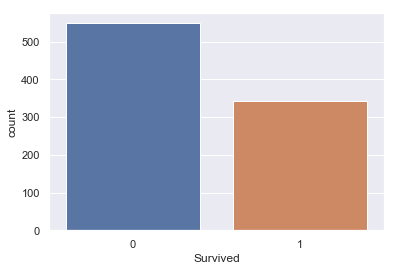

In [12]:
# import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score


%matplotlib inline
sns.set()
sns.countplot(x='Survived', data=train_data);


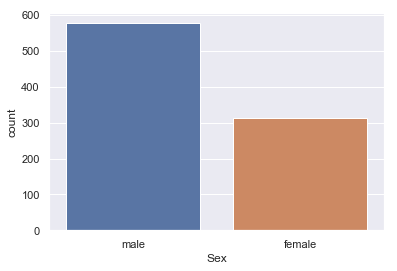

In [13]:
sns.countplot(x='Sex', data=train_data);

C:\Users\Hp\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


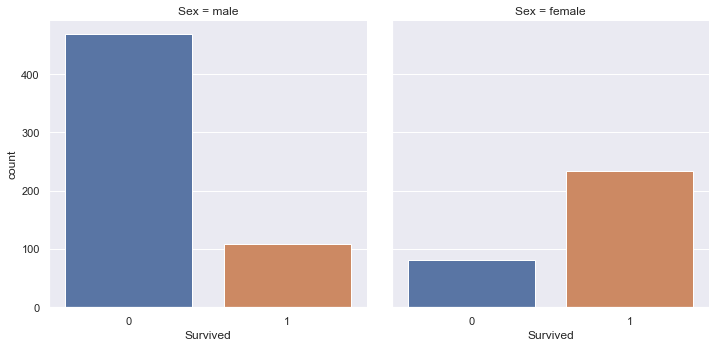

In [14]:
sns.factorplot(x='Survived', col='Sex', kind='count', data=train_data);

In [15]:
train_data.groupby(['Sex']).Survived.sum()


Sex
female    233
male      109
Name: Survived, dtype: int64

C:\Users\Hp\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


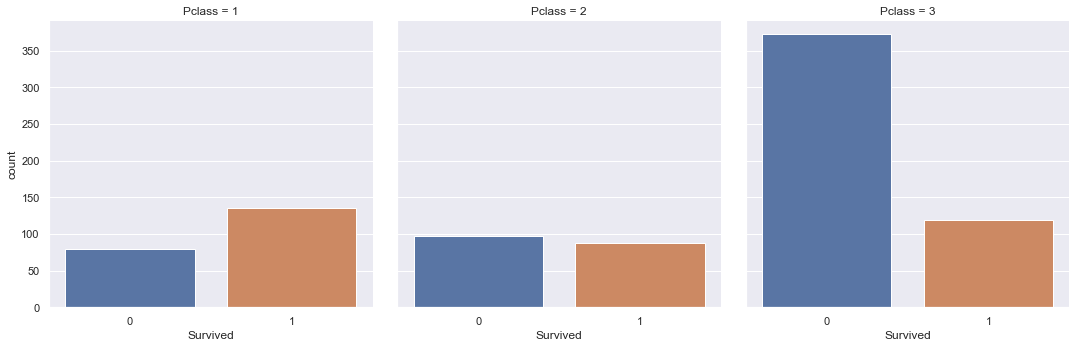

In [16]:
sns.factorplot(x='Survived', col='Pclass', kind='count', data=train_data);


C:\Users\Hp\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


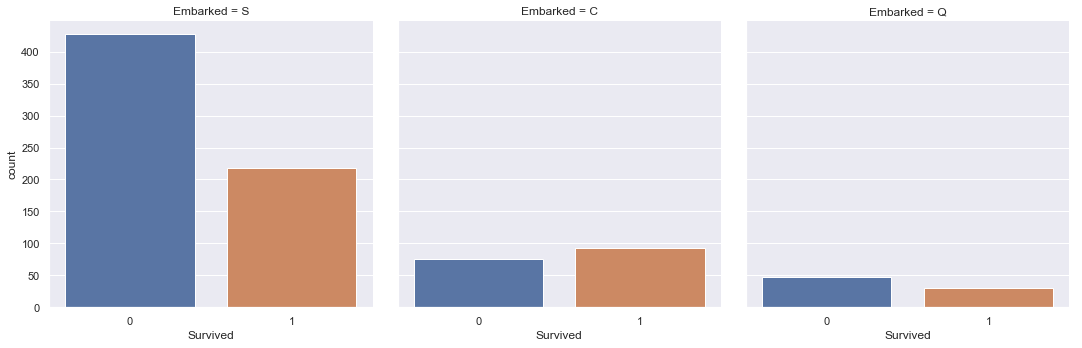

In [17]:
sns.factorplot(x='Survived', col='Embarked', kind='count', data=train_data);


C:\Users\Hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


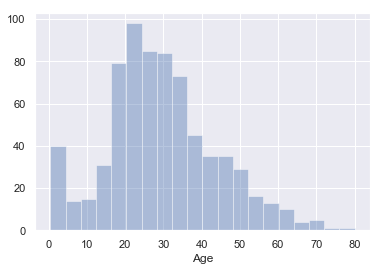

In [18]:
df_train_drop = train_data.dropna()
sns.distplot(df_train_drop.Age, kde=False);

## let's do pairplot so that we could visualize whole data at once

C:\Users\Hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Hp\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


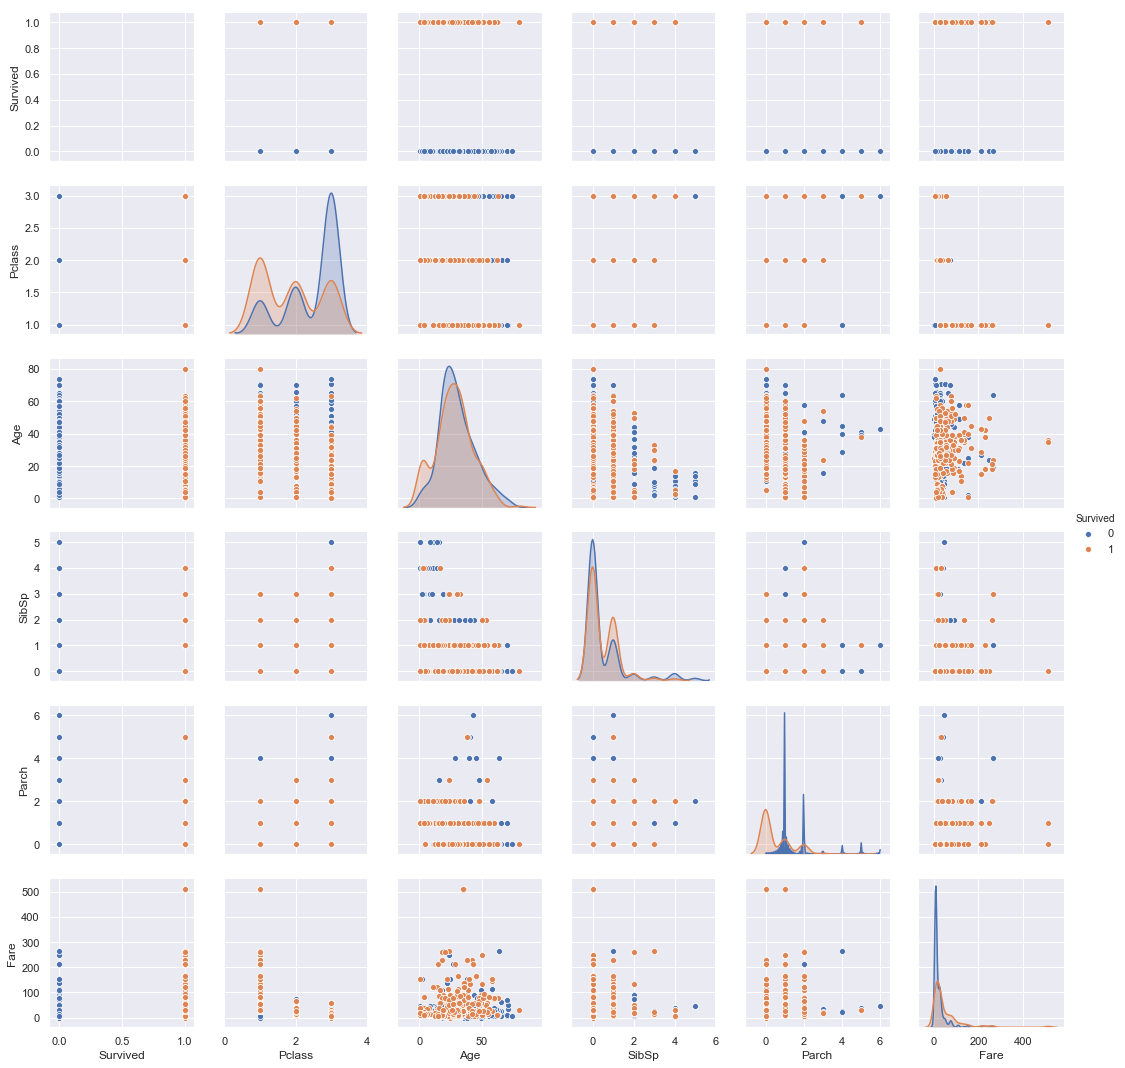

In [19]:
sns.pairplot(df_train_drop, hue='Survived');


# Now let's preprocess data for ML models implementation
    

## Encoding categorical data 

In [20]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [21]:
# Sex feature
le_sex = LabelEncoder()
sex_numerical = le_sex.fit_transform(train_data['Sex'])
sex_numerical_classes = le_sex.classes_

In [23]:
# Title feature
le_title = LabelEncoder()
title_numerical = le_title.fit_transform(train_data['Title'])
title_numerical_classes = le_title.classes_

### Before LabelEncoding embarked features we impute two missing values , here from general analysis 's' is the most repeated so impute with 's' 

In [24]:
#now assign 'S' to null embarked features 
train_data.set_value([62, 830], 'Embarked', 'S')

# embarked feature
le_embarked = LabelEncoder()
embarked_numerical = le_title.fit_transform(train_data['Embarked'])
embarked_numerical_classes = le_title.classes_

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


### Now it's time to one hot encode those label encoded features 
we do so by defining a OneHotEncoder method as follows:

In [25]:
#one hot encoder method

def pdAssignWithOHLabel(df, column, onehot_labeled, class_labels):
    to_assign = {}
    for c_idx, label in enumerate(class_labels):
        to_assign[column+'_'+label] = onehot_labeled[:,c_idx]
    df = df.assign(**to_assign)
    return df

In [26]:
# Sex feature
enc_sex = OneHotEncoder(sparse=False)
sex_onehot = enc_sex.fit_transform(sex_numerical.reshape(-1,1))

# Title feature
enc_title = OneHotEncoder(sparse=False)
title_onehot = enc_title.fit_transform(title_numerical.reshape(-1,1))

# Sex feature
train_data = pdAssignWithOHLabel(train_data, 'Sex', 
                                 sex_onehot, sex_numerical_classes)
train_data = train_data.drop('Sex',axis=1)

# Title feature
train_data = pdAssignWithOHLabel(train_data, 'Title', 
                                 title_onehot, title_numerical_classes)
train_data = train_data.drop('Title',axis=1)

#### After onehot encoding all those features, Now it's time to take care of overvalued 'fare' feature

In [29]:
#taking care of overvalued fare
mu = train_data['Fare'].mean()
sd = train_data['Fare'].std()

row_mask = train_data['Fare']>mu+5*sd
train_data.set_value(row_mask, 'Fare', mu+5*sd).head()

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male,Title_Army.,Title_Dr.,Title_Master.,Title_Miss.,Title_Mr.,Title_Mrs.,Title_Noble.,Title_Rev.
PassengerId,,,,,,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,S,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,1,38.0,1,0,71.2833,C,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,3,26.0,0,0,7.9250,S,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,1,35.0,1,0,53.1000,S,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0,3,35.0,0,0,8.0500,S,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [30]:
#scaling
from sklearn.preprocessing import StandardScaler
sc_tmp = StandardScaler()
tmp_scaled = train_data.copy().drop(['Embarked','Age','Survived'], axis=1) # create a copy of the data
tmp_scaled = pd.DataFrame(sc_tmp.fit_transform(tmp_scaled),columns=tmp_scaled.columns, index=tmp_scaled.index)

# Add the non-scaled features to this temporary DataFrame
tmp_scaled = tmp_scaled.assign(Survived=train_data['Survived'])
tmp_scaled = tmp_scaled.assign(Embarked=train_data['Embarked'])
tmp_scaled = tmp_scaled.assign(Age=train_data['Age'])

In [31]:
#imputation
mu = train_data['Fare'].mean()
sd = train_data['Fare'].std()

row_mask = train_data['Fare']>mu+5*sd
train_data.set_value(row_mask, 'Fare', mu+5*sd);


from sklearn.preprocessing import StandardScaler
sc_tmp = StandardScaler()
tmp_scaled = train_data.copy().drop(['Embarked','Age','Survived'], axis=1) # create a copy of the data
tmp_scaled = pd.DataFrame(sc_tmp.fit_transform(tmp_scaled),columns=tmp_scaled.columns, index=tmp_scaled.index)

# Add the non-scaled features to this temporary DataFrame
tmp_scaled = tmp_scaled.assign(Survived=train_data['Survived'])
tmp_scaled = tmp_scaled.assign(Embarked=train_data['Embarked'])
tmp_scaled = tmp_scaled.assign(Age=train_data['Age'])

# Encode the values with numerical labels
le_embarked = LabelEncoder()
embarked_numerical = le_embarked.fit_transform(train_data['Embarked'])
embarked_numerical_classes = le_embarked.classes_
print('Classes of Embarked feature:\n{}\n{}'.format(
        np.arange(len(embarked_numerical_classes)), 
        embarked_numerical_classes))

Classes of Embarked feature:
[0 1 2]
['C' 'Q' 'S']


C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [32]:
# One-Hot encoding
enc_embarked = OneHotEncoder(sparse=False)
embarked_onehot = enc_embarked.fit_transform(embarked_numerical.reshape(-1,1))

# Add new features
train_data = pdAssignWithOHLabel(train_data, 'Embarked', embarked_onehot, 
                                 embarked_numerical_classes)
tmp_scaled = pdAssignWithOHLabel(tmp_scaled, 'Embarked', embarked_onehot, 
                                 embarked_numerical_classes)
# Drop old feature
train_data = train_data.drop('Embarked',axis=1)
tmp_scaled = tmp_scaled.drop('Embarked',axis=1)

#assingning scaled features of embarked

# Assign the scaled features to train_data
sc_tmp = StandardScaler()
tmp = tmp_scaled[['Embarked_C', 'Embarked_Q', 'Embarked_S']].copy()
tmp = pd.DataFrame(sc_tmp.fit_transform(tmp),columns=tmp.columns, index=tmp.index)

# Drop the unscaled features from train_data 
tmp_scaled = tmp_scaled.drop(['Embarked_C', 'Embarked_Q', 'Embarked_S'], 
                             axis=1)

# Assign the scaled features to train_data
tmp_scaled = tmp_scaled.assign(Embarked_C=tmp['Embarked_C'])
tmp_scaled = tmp_scaled.assign(Embarked_Q=tmp['Embarked_Q'])
tmp_scaled = tmp_scaled.assign(Embarked_S=tmp['Embarked_S'])

In [33]:
# imputation and scaling of age

def knnImpute(ori_arr, tmp_imp_arr, feature, k=6): # improved one
    from sklearn.neighbors import KDTree
    row_idx = ori_arr[pd.isnull(ori_arr[feature])].index.tolist()
    tree = KDTree(tmp_imp_arr) # tmp_arr is the array without 
                           # the null-containing feature
    #row_idx = np.add(row_idx, -1)
    for nan_v in row_idx:
        # Uncomment print statements below to get some more insight
        #print('Passenger: {}'.format(nan_v))
        dist, ind = tree.query(tmp_imp_arr[nan_v,:].reshape(1,-1), k)
        #print(tmp_arr[nan_v,:])
        #print(ind[0])
        nn_vals = ori_arr[feature].loc[ind[0][1:]]
        imp_val = np.floor(np.nanmean(nn_vals))+0.5 
        # Per the documentation on this Kaggle data set, estimated
        # 'Age' values are of the form x.5
        
        #print('{} closest neigbors to passenger {} and their values for ' \
        #'Age:\n{}\n'.format(k-1, nan_v, ori_arr[feature].loc[ind[0]]))
        #print('Imputed value would be {}\n'.format(imp_val))
        ori_arr.set_value(nan_v, feature, imp_val)
    return ori_arr
tmp_imp = tmp_scaled.copy().drop('Age', axis = 1).values
train_data = knnImpute(train_data, tmp_imp, 'Age', 8)

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


### Now let's fit our data to ML models

In [34]:
# Extract training data (without Survived feature) and class labels
columns = ['Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Title_Army.', 'Title_Dr.', 'Title_Master.', 'Title_Miss.', 'Title_Mr.',
       'Title_Mrs.', 'Title_Noble.', 'Title_Rev.',
       'Embarked_C', 'Embarked_Q', 'Embarked_S']

train_data_df = train_data # Keep the full train_data DataFrame for later usage
train_labels = train_data['Survived'].values.ravel()
train_data = train_data[columns].values

In [37]:
# General import statements
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

# LOGISTIC REGRESSION 
We Perform this by manually splitting training dataset into 75% training set and 25% testing set

In [38]:
############ LOGISTIC REGRESSION CLASSIFIER #################3

dataset = train_data_df
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting classifier to the Training set
# Create your classifier here
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [39]:
cm

array([[117,  22],
       [ 19,  65]], dtype=int64)

## Let's automate model fitting task using GridSearchCv class

In [40]:
# Overall classifier performance DataFrame
overall_res = pd.DataFrame(columns=['Classifier', 'Best_clf_retrained', 'Best_test_score'])

## Decesion Tree Classifier

In [41]:
# Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
clf_name = 'DecisionTree'

sc = StandardScaler()
clf = DecisionTreeClassifier()
# Make pipeline
pipeline = Pipeline([('sc', sc),('clf', clf)])
fit_params = {'clf__criterion':['gini','entropy'],
    'clf__min_samples_split':[2,3,4,5,6,7,8,9,10,12,14,16,18,20,22,24,26,28,30,32],
    'clf__min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
# Initiate GridSearchCV
gs = GridSearchCV(pipeline, fit_params, cv=7, n_jobs=-1)
# Fit GridSearchCV
gs.fit(train_data, train_labels)

cv = pd.DataFrame(gs.cv_results_) # To check all the classifier performances

overall_res = overall_res.append({'Classifier': clf_name, 'Best_clf_retrained': 
                            gs.best_estimator_.fit(train_data, train_labels), 
                            'Best_test_score': gs.best_score_}, ignore_index=True);
print('Best performing classifier parameters (score {}):\n{}'.format(gs.best_score_,gs.best_params_))

Best performing classifier parameters (score 0.8338945005611672):
{'clf__criterion': 'gini', 'clf__min_samples_leaf': 10, 'clf__min_samples_split': 24}


C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\utils\deprecatio

In [42]:
# SVM classifier
from sklearn.svm import SVC
clf_name = 'SVM'

sc = StandardScaler()
clf = SVC()
# Make pipeline
pipeline = Pipeline([('sc', sc),('clf', clf)])
fit_params = {'clf__kernel':['rbf','linear', 'poly'],'clf__degree':[2, 3, 4, 5]}
# Initiate GridSearchCV
gs = GridSearchCV(pipeline, fit_params, cv=7, n_jobs=-1)
# Fit GridSearchCV
gs.fit(train_data, train_labels)

cv = pd.DataFrame(gs.cv_results_) # To check all the classifier performances

overall_res = overall_res.append({'Classifier': clf_name, 'Best_clf_retrained': 
                            gs.best_estimator_.fit(train_data, train_labels), 
                            'Best_test_score': gs.best_score_}, ignore_index=True);
print('Best performing classifier parameters (score {}):\n{}'.format(gs.best_score_,gs.best_params_))

Best performing classifier parameters (score 0.8282828282828283):
{'clf__degree': 2, 'clf__kernel': 'rbf'}


C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\utils\deprecatio

In [43]:
# k-NN classifier
from sklearn.neighbors import KNeighborsClassifier as KNC
clf_name = 'KNN'

sc = StandardScaler()
clf = KNC()
# Make pipeline
pipeline = Pipeline([('sc', sc),('clf', clf)])
fit_params = {'clf__n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,20,25,30,40],
                 'clf__weights':['uniform','distance'],
                 'clf__p':[1, 2]}
# Initiate GridSearchCV
gs = GridSearchCV(pipeline, fit_params, cv=7, n_jobs=-1)
# Fit GridSearchCV
gs.fit(train_data, train_labels)

cv = pd.DataFrame(gs.cv_results_) # To check all the classifier performances

overall_res = overall_res.append({'Classifier': clf_name, 'Best_clf_retrained': 
                            gs.best_estimator_.fit(train_data, train_labels), 
                            'Best_test_score': gs.best_score_}, ignore_index=True);
print('Best performing classifier parameters (score {}):\n{}'.format(gs.best_score_,gs.best_params_))

Best performing classifier parameters (score 0.8305274971941639):
{'clf__n_neighbors': 12, 'clf__p': 1, 'clf__weights': 'uniform'}


C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\utils\deprecatio

In [44]:
# Random Forest classifier
from sklearn.ensemble import RandomForestClassifier as RFC
clf_name = 'RandomForest'

sc = StandardScaler()
clf = RFC()
# Make pipeline
pipeline = Pipeline([('sc', sc),('clf', clf)])
fit_params = {'clf__n_estimators':[100],
              'clf__min_samples_split':[2,3,4,5,6,7,8,9,10,11,12,13,16],
              'clf__min_samples_leaf':[1,2,3,4,5,6,7],
              'clf__max_features':[None,'auto']}
# Initiate GridSearchCV
gs = GridSearchCV(pipeline, fit_params, cv=7, n_jobs=-1)
# Fit GridSearchCV
gs.fit(train_data, train_labels)

cv = pd.DataFrame(gs.cv_results_) # To check all the classifier performances

overall_res = overall_res.append({'Classifier': clf_name, 'Best_clf_retrained': 
                            gs.best_estimator_.fit(train_data, train_labels), 
                            'Best_test_score': gs.best_score_}, ignore_index=True);
print('Best performing classifier parameters (score {}):\n{}'.format(gs.best_score_,gs.best_params_))

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing

Best performing classifier parameters (score 0.8473625140291807):
{'clf__max_features': 'auto', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}


In [45]:
overall_res

,Classifier,Best_clf_retrained,Best_test_score
0,DecisionTree,"Pipeline(memory=None,\n steps=[('sc', Stan...",0.833895
1,SVM,"Pipeline(memory=None,\n steps=[('sc', Stan...",0.828283
2,KNN,"Pipeline(memory=None,\n steps=[('sc', Stan...",0.830527
3,RandomForest,"Pipeline(memory=None,\n steps=[('sc', Stan...",0.847363


#### RandomForest could give best result of 84.73 accuracy